In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
file = r'covid19_casos_brasil.csv'

df = pd.read_csv(file)
df = df.drop('city_ibge_code',axis=1)
Q1 = df[df['is_repeated'] == False]
Q1['date'] = pd.to_datetime(Q1['date'])
Q1.head()

In [7]:
sul_cities = ['Florianópolis','Porto Alegre', 'Curitiba']
sudeste_cities = ['São Paulo','Rio de Janeiro','Belo Horizonte','Vitória']

sul_data = Q1[Q1['city'].isin(sul_cities)][['date','last_available_confirmed','last_available_deaths','city']]
sudeste_data = Q1[Q1['city'].isin(sudeste_cities)][['date','last_available_confirmed','last_available_deaths','city']]
joinville_data = Q1[Q1['city'].isin(['Joinville'])][['date','last_available_confirmed','last_available_deaths','city']]

In [9]:
def _plot_line(dataFrame, axs, xAxisName, yAxisName, hue = None, style = None, xlabel = 'x', ylabel ='y', grapthTitle = '', legendTitle = ''):
  lines = sns.lineplot(data = dataFrame,
    x = xAxisName,
    y = yAxisName,
    hue = hue,
    style = style,
    ax = ax[axs])

  ax[axs].set(xlabel = xlabel, ylabel = ylabel, title = grapthTitle)
  ax[axs].tick_params(axis='x', rotation=20)
  ax[axs].set_xticks(dataFrame[xAxisName][::int(len(dataFrame[xAxisName])/10)])
  ax[axs].get_legend().set_visible(False)


  return lines

def _plot_bar(dataFrame, axs, xAxisName, yAxisName, hue = None, lim = 100, orient = 'x', xlabel = 'x', ylabel ='y', grapthTitle = '', legendTitle = ''):
  bars = sns.barplot(data = dataFrame,
    x = xAxisName,
    y = yAxisName,
    hue = hue,
    ax = ax[axs],
    errorbar = None,
    orient = orient,
    saturation = 1,
    estimator = 'max')

  ax[axs].set(xlabel = xlabel, ylabel = ylabel, title = grapthTitle)

  return bars

Joinville data

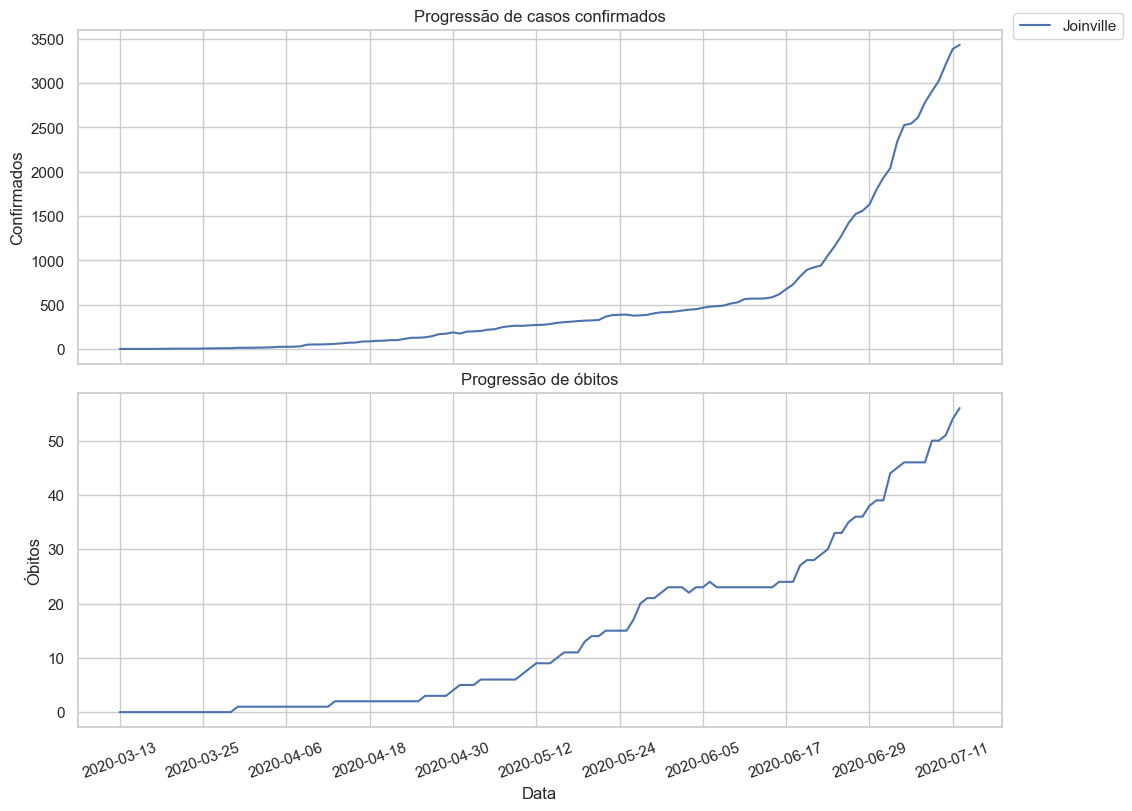

In [25]:
fig,ax = plt.subplots(2, 1, figsize = (10,8), layout = 'constrained', sharex = True)

lines = _plot_line(dataFrame = joinville_data,
  axs = 0,
  xAxisName = 'date',
  yAxisName = 'last_available_confirmed',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Confirmados',
  grapthTitle = 'Progressão de casos confirmados',
  legendTitle = 'Cidade')

lines = _plot_line(dataFrame = joinville_data,
  axs = 1,
  xAxisName ='date',
  yAxisName ='last_available_deaths',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Óbitos',
  grapthTitle = 'Progressão de óbitos',
  legendTitle = 'Cidade')

handles, labels = lines.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

South data

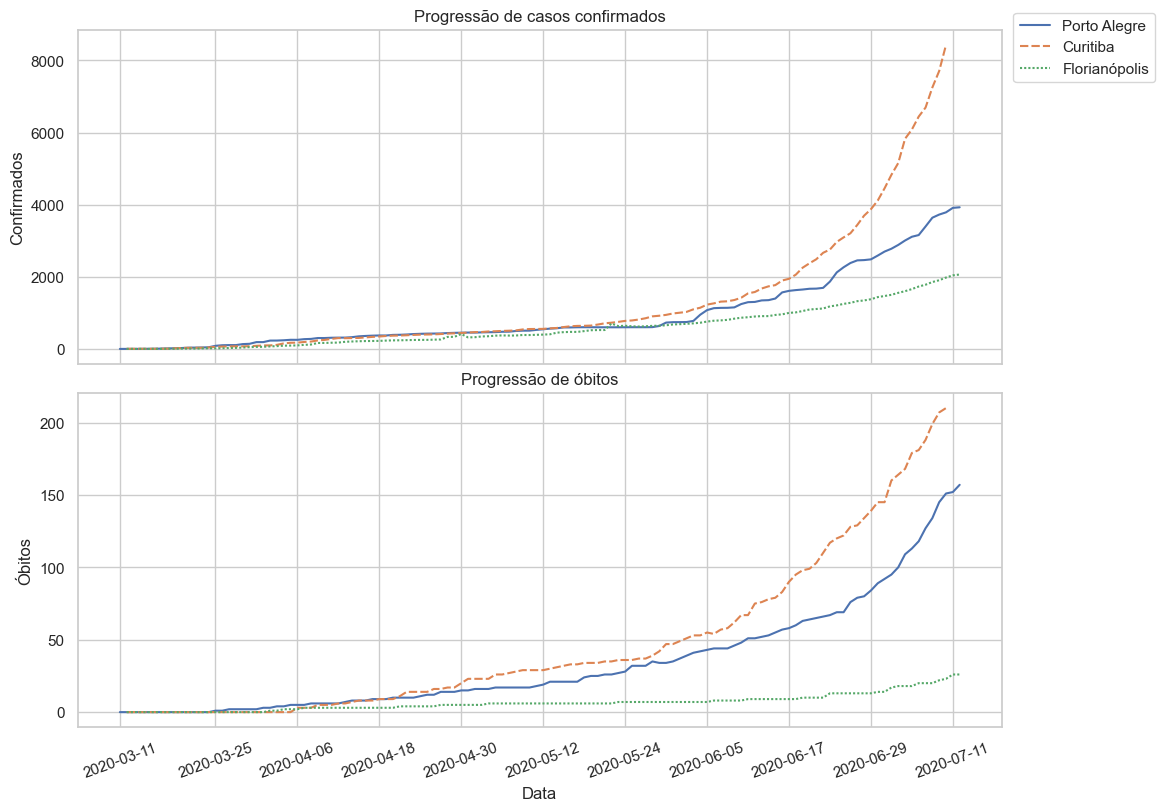

In [26]:
fig,ax = plt.subplots(2, 1, figsize = (10,8), layout = 'constrained', sharex = True)

lines = _plot_line(dataFrame = sul_data,
  axs = 0,
  xAxisName = 'date',
  yAxisName = 'last_available_confirmed',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Confirmados',
  grapthTitle = 'Progressão de casos confirmados',
  legendTitle = 'Cidade')

lines = _plot_line(dataFrame = sul_data,
  axs = 1,
  xAxisName ='date',
  yAxisName ='last_available_deaths',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Óbitos',
  grapthTitle = 'Progressão de óbitos',
  legendTitle = 'Cidade')

handles, labels = lines.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

Southeast data

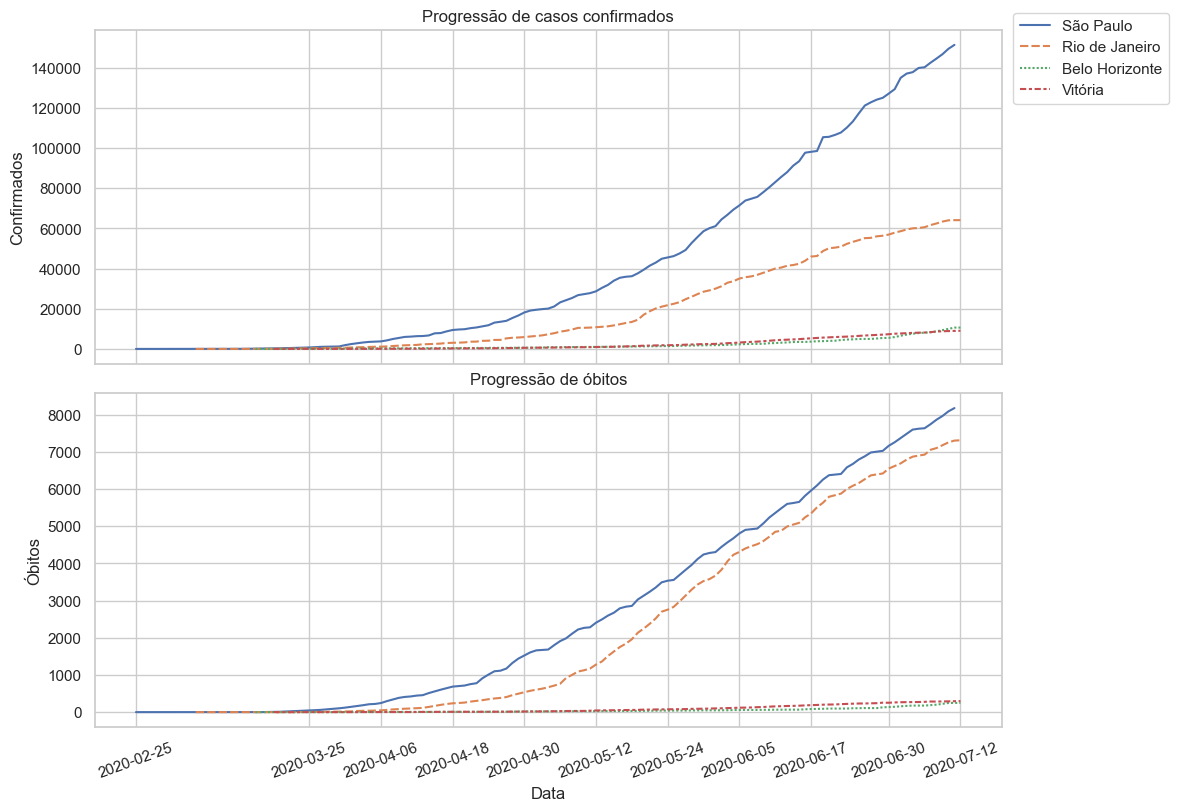

In [27]:
fig,ax = plt.subplots(2, 1, figsize = (10,8), layout = 'constrained', sharex = True)

lines = _plot_line(dataFrame = sudeste_data,
  axs = 0,
  xAxisName = 'date',
  yAxisName = 'last_available_confirmed',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Confirmados',
  grapthTitle = 'Progressão de casos confirmados',
  legendTitle = 'Cidade')

lines = _plot_line(dataFrame = sudeste_data,
  axs = 1,
  xAxisName = 'date',
  yAxisName = 'last_available_deaths',
  hue = 'city',
  style = 'city',
  xlabel = 'Data',
  ylabel = 'Óbitos',
  grapthTitle = 'Progressão de óbitos',
  legendTitle = 'Cidade')
handles, labels = lines.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

In [13]:
Capitais =["Manaus", "Macapá", "Porto Velho", "Rio Branco", "Boa Vista", "Belém", "Palmas", "Curitiba", "Porto Alegre", "Florianópolis", "São Paulo", "Rio de Janeiro", "Belo Horizonte", "Vitória", "Goiânia", "Cuiabá", "Campo Grande", "Brasília", "Recife", "Salvador", "Fortaleza", "Natal", "Aracaju", "Maceió", "São Luís", "João Pessoa", "Teresina"]

In [23]:
# Q2 = df[df['is_repeated'] == False]
Q2 = df
Q2 = Q2[df['city'].isin(Capitais)][['city', 'estimated_population_2019', 'new_confirmed', 'new_deaths']]

capitals_grouped = Q2.groupby(['city','estimated_population_2019']).sum().reset_index().sort_values(by = 'city')
capitals_grouped = capitals_grouped.rename(columns={'new_confirmed':'total_confirmed','new_deaths':'total_deaths'})

capitals_grouped['percentual_confirmed'] = np.round(capitals_grouped['total_confirmed']/capitals_grouped['estimated_population_2019']*100,2)
capitals_grouped['percentual_deaths'] = np.round(capitals_grouped['total_deaths']/capitals_grouped['estimated_population_2019']*100,2)
capitals_grouped = capitals_grouped.sort_values(by='percentual_confirmed', ascending = False)

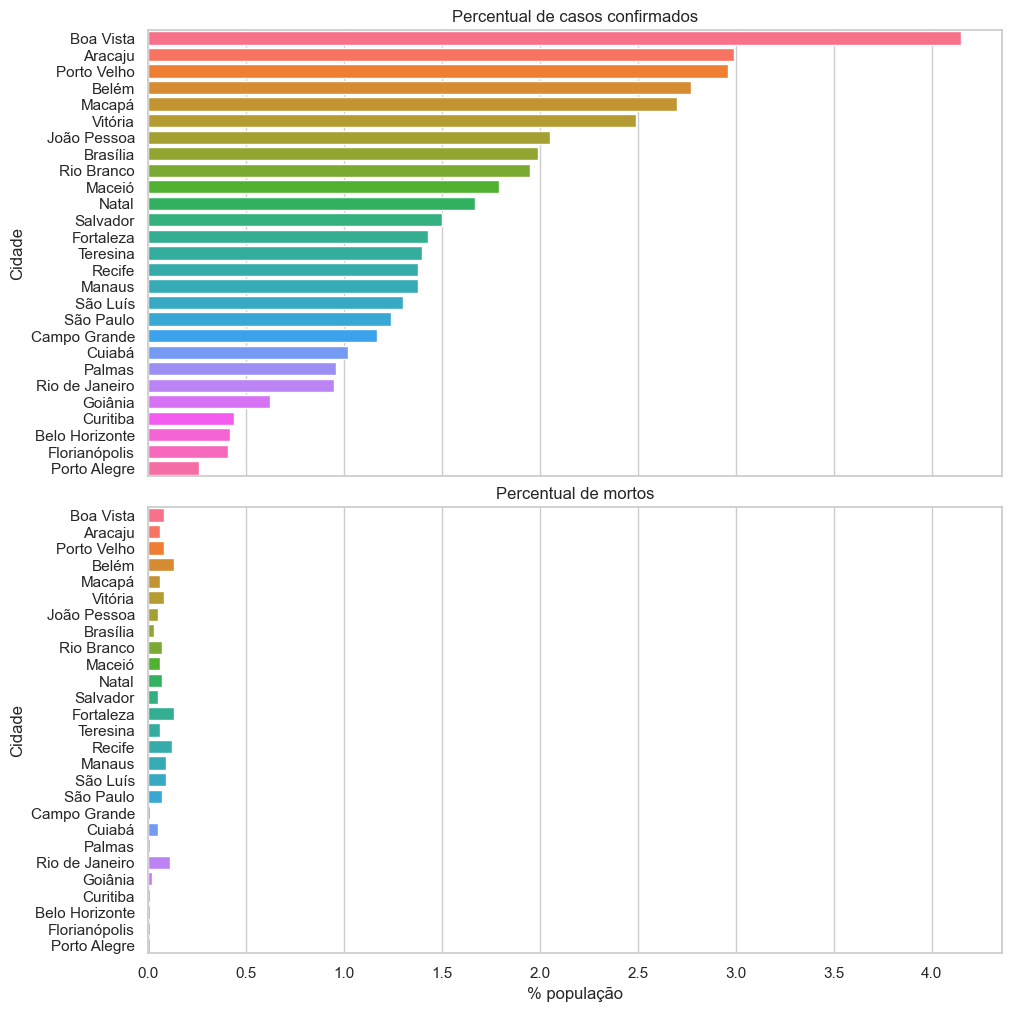

In [24]:
fig,ax = plt.subplots(2, 1, figsize = (10,10), layout = 'constrained', sharex = True)

bar = _plot_bar(dataFrame = capitals_grouped,
  axs = 0,
  xAxisName = 'percentual_confirmed',
  yAxisName = 'city',
  hue = 'city',
  xlabel = '% população',
  ylabel = 'Cidade',
  grapthTitle = 'Percentual de casos confirmados',
  legendTitle = 'Cidade',
  orient = 'y')

bar = _plot_bar(dataFrame = capitals_grouped,
  axs = 1,
  xAxisName = 'percentual_deaths',
  yAxisName = 'city',
  hue = 'city',
  xlabel = '% população',
  ylabel = 'Cidade',
  grapthTitle = 'Percentual de mortos',
  legendTitle = 'Cidade',
  orient = 'y')

plt.show()
